# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [36]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

## Some helper functions
The following functions will generate data and polynomial values.

In [37]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [3]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [56]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

In [13]:
# yhat
# sse
bias

0.25340798038044077

('Coefficients: \n', array([-0.19258003]))
Variance score: 0.02
Residual sum of squares: 0.57
Bias: 0.551817884047
Variance: 0.0110247112033


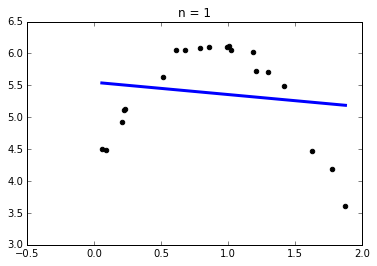

('Coefficients: \n', array([-0.29847015]))
Variance score: 0.17
Residual sum of squares: 0.57
Bias: 0.466199115914
Variance: 0.0966434793357


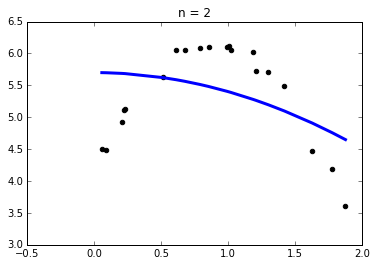

('Coefficients: \n', array([-0.22420363]))
Variance score: 0.32
Residual sum of squares: 0.57
Bias: 0.381547792354
Variance: 0.181294802896


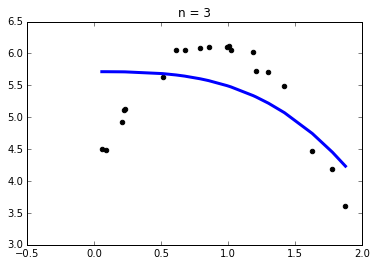

('Coefficients: \n', array([-0.14039997]))
Variance score: 0.41
Residual sum of squares: 0.57
Bias: 0.326547177972
Variance: 0.236295417278


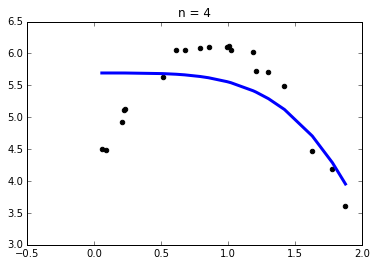

('Coefficients: \n', array([-0.08173433]))
Variance score: 0.47
Residual sum of squares: 0.57
Bias: 0.295266115022
Variance: 0.267576480228


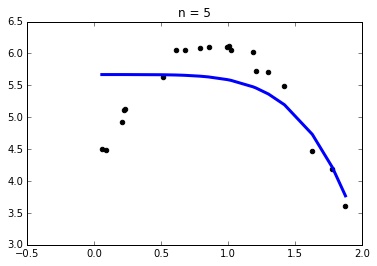

('Coefficients: \n', array([-0.04593273]))
Variance score: 0.50
Residual sum of squares: 0.57
Bias: 0.279016336375
Variance: 0.283826258875


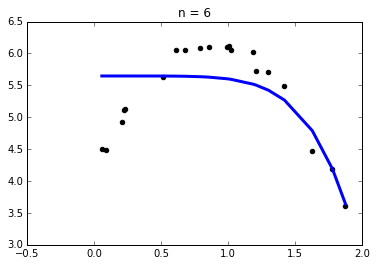

('Coefficients: \n', array([-0.02532163]))
Variance score: 0.51
Residual sum of squares: 0.57
Bias: 0.27176371139
Variance: 0.29107888386


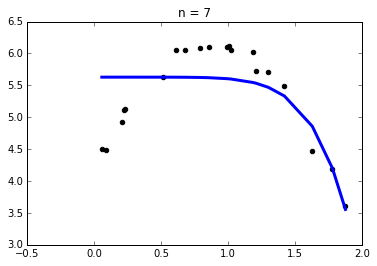

('Coefficients: \n', array([-0.01380038]))
Variance score: 0.51
Residual sum of squares: 0.57
Bias: 0.26982389324
Variance: 0.293018702009


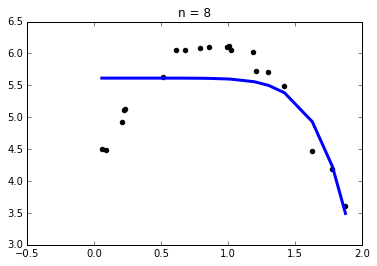

('Coefficients: \n', array([-0.00746649]))
Variance score: 0.51
Residual sum of squares: 0.57
Bias: 0.271010055976
Variance: 0.291832539274


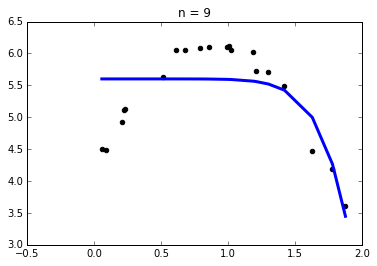

('Coefficients: \n', array([-0.00401973]))
Variance score: 0.50
Residual sum of squares: 0.57
Bias: 0.27402152481
Variance: 0.28882107044


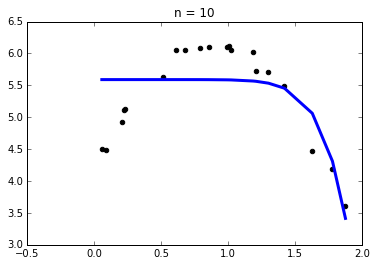

In [57]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 11):
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

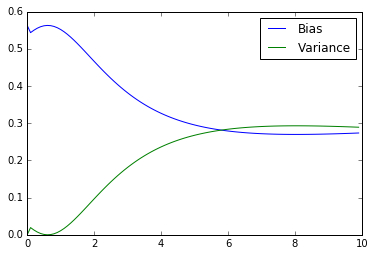

In [58]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

('Coefficients: \n', array([-0.19258003]))
Variance score: 0.02
Residual sum of squares: 0.57
Bias: 0.551817884047
Variance: 0.0110247112033


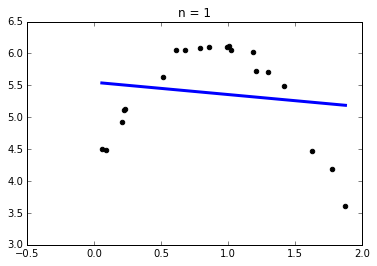

('Coefficients: \n', array([ 4.43490312, -2.52530804]))
Variance score: 0.98
Residual sum of squares: 0.57
Bias: -0.000955584008969
Variance: 0.563798179259


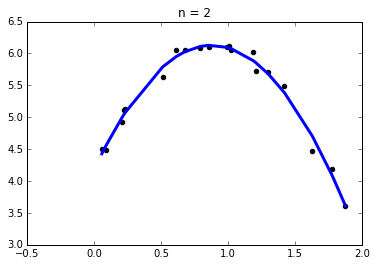

('Coefficients: \n', array([ 4.3990934 , -2.47776383, -0.0165083 ]))
Variance score: 0.98
Residual sum of squares: 0.57
Bias: -0.000959849832899
Variance: 0.563802445083


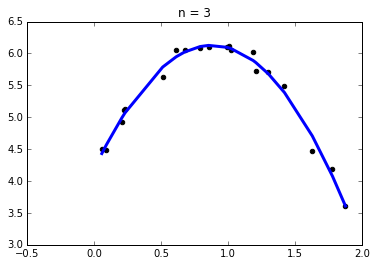

('Coefficients: \n', array([ 3.81939603, -1.1407168 , -1.09651664,  0.28122833]))
Variance score: 0.98
Residual sum of squares: 0.57
Bias: -0.00121634124768
Variance: 0.564058936498


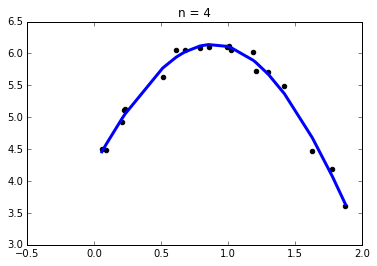

('Coefficients: \n', array([ 4.65586962, -4.10206293,  2.99586242, -2.12698872,  0.50543791]))
Variance score: 0.99
Residual sum of squares: 0.57
Bias: -0.00143549606882
Variance: 0.564278091319


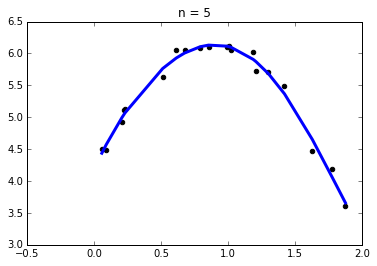

('Coefficients: \n', array([ 4.32119898, -2.36054251, -0.66706181,  1.48609231, -1.16589503,
        0.29255945]))
Variance score: 0.99
Residual sum of squares: 0.57
Bias: -0.00144975048253
Variance: 0.564292345732


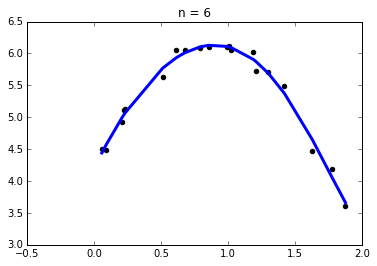

('Coefficients: \n', array([  1.07515332,  19.18223654, -60.91026142,  85.7814077 ,
       -63.38280849,  23.44134052,  -3.41925781]))
Variance score: 0.99
Residual sum of squares: 0.57
Bias: -0.00170986484507
Variance: 0.564552460095


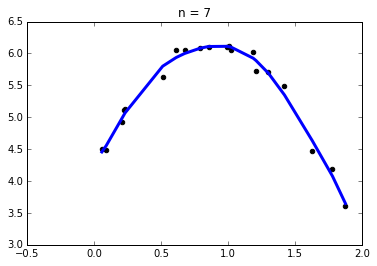

('Coefficients: \n', array([  13.41584138,  -74.68513696,  257.75670487, -487.1768096 ,
        521.5047162 , -316.96029348,  101.76517762,  -13.38429152]))
Variance score: 0.99
Residual sum of squares: 0.57
Bias: -0.00252546737838
Variance: 0.565368062628


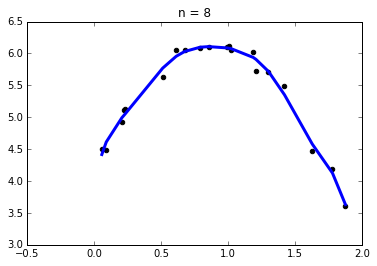

('Coefficients: \n', array([  -19.99225283,   220.36516309,  -973.37783745,  2349.39947337,
       -3356.69825221,  2904.81235748, -1492.9311322 ,   418.715629  ,
         -49.30113409]))
Variance score: 0.99
Residual sum of squares: 0.57
Bias: -0.00530322572997
Variance: 0.56814582098


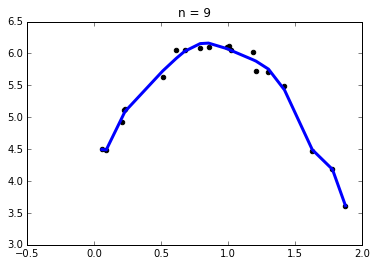

In [59]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

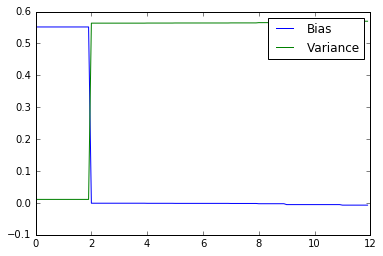

In [60]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity


('Coefficients: \n', array([ 1.02887808]))
Variance score: 0.97
Residual sum of squares: 0.30
Bias: -0.00209587070772
Variance: 0.291338943635


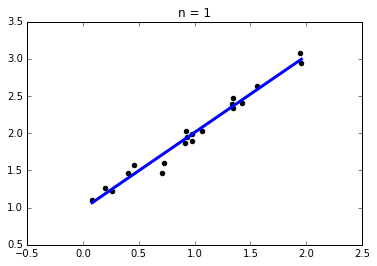

('Coefficients: \n', array([ 3.92999284]))
Variance score: 0.89
Residual sum of squares: 7.65
Bias: 0.818971042178
Variance: 6.82118438759


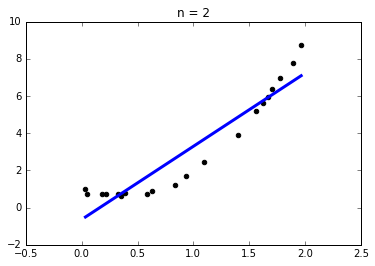

('Coefficients: \n', array([ 9.41162877]))
Variance score: 0.81
Residual sum of squares: 36.97
Bias: 6.90227507975
Variance: 30.0563375272


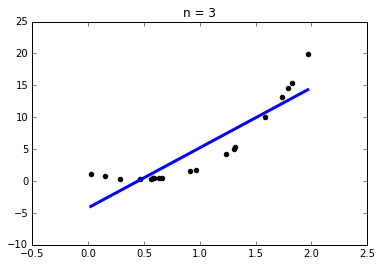

('Coefficients: \n', array([ 20.85177805]))
Variance score: 0.87
Residual sum of squares: 131.50
Bias: 16.8620640764
Variance: 114.622999111


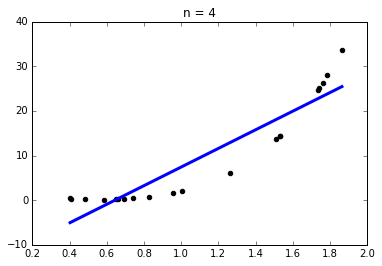

('Coefficients: \n', array([ 41.50221197]))
Variance score: 0.80
Residual sum of squares: 863.70
Bias: 176.546112443
Variance: 687.142297743


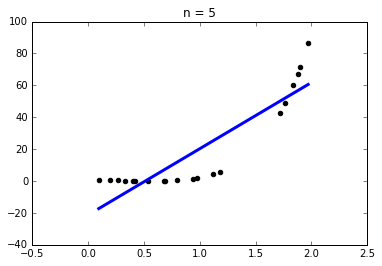

('Coefficients: \n', array([ 44.4537947]))
Variance score: 0.56
Residual sum of squares: 811.90
Bias: 360.254354427
Variance: 451.636917387


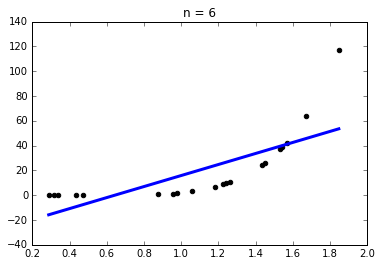

In [61]:
random.seed(1000)
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

# Advanced Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

('Coefficients: \n', array([-0.31643008]))
Variance score: 0.61
Residual sum of squares: 0.47
Bias: 0.171220510332
Variance: 0.289013865049


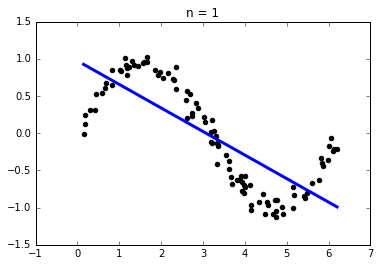

('Coefficients: \n', array([-0.44023457,  0.01947614]))
Variance score: 0.62
Residual sum of squares: 0.47
Bias: 0.168095539902
Variance: 0.292138835479


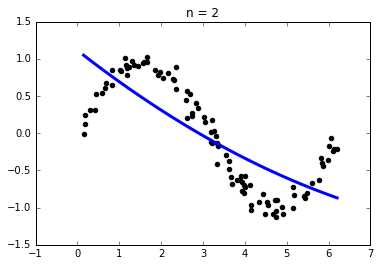

('Coefficients: \n', array([ 1.91954846, -0.87911443,  0.09299354]))
Variance score: 0.97
Residual sum of squares: 0.47
Bias: 0.00185297755251
Variance: 0.458381397829


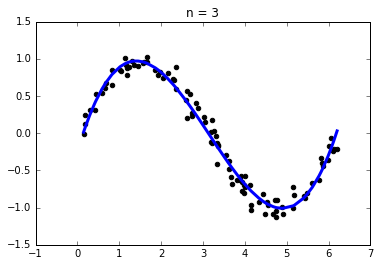

('Coefficients: \n', array([  1.85686536e+00,  -8.35988264e-01,   8.24671808e-02,
         8.33063647e-04]))
Variance score: 0.97
Residual sum of squares: 0.47
Bias: 0.00182081362804
Variance: 0.458413561753


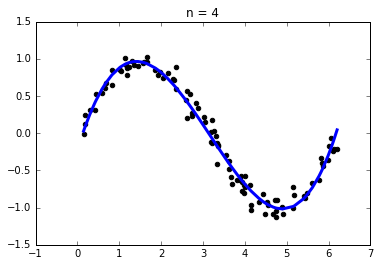

('Coefficients: \n', array([ 0.98375818,  0.09383926, -0.30400709,  0.06938564, -0.00434922]))
Variance score: 0.98
Residual sum of squares: 0.47
Bias: -9.95733430434e-05
Variance: 0.460333948724


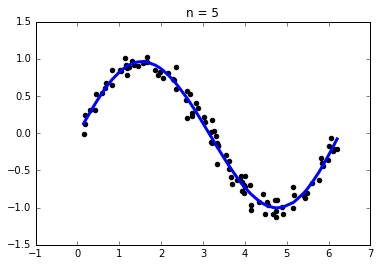

('Coefficients: \n', array([  1.67938506e+00,  -9.21703158e-01,   3.12584875e-01,
        -1.09647607e-01,   2.03340465e-02,  -1.29828114e-03]))
Variance score: 0.98
Residual sum of squares: 0.47
Bias: -0.000499173985038
Variance: 0.460733549366


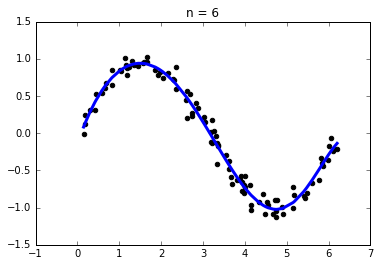

('Coefficients: \n', array([  1.88687055e+00,  -1.31331605e+00,   6.35173087e-01,
        -2.44954273e-01,   5.05269686e-02,  -4.71037811e-03,
         1.53512990e-04]))
Variance score: 0.98
Residual sum of squares: 0.47
Bias: -0.000512783904451
Variance: 0.460747159285


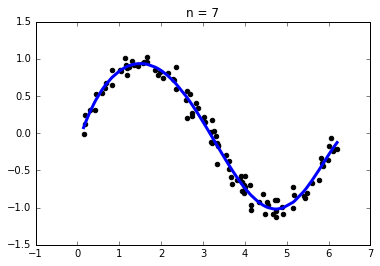

('Coefficients: \n', array([  2.07811122e+00,  -1.76647207e+00,   1.12017991e+00,
        -5.19676465e-01,   1.38465212e-01,  -2.06783708e-02,
         1.68629355e-03,  -6.03791113e-05]))
Variance score: 0.98
Residual sum of squares: 0.47
Bias: -0.000517489713177
Variance: 0.460751865094


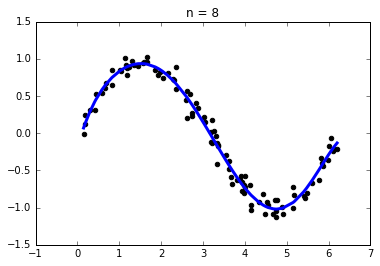

('Coefficients: \n', array([  6.01809909e-01,   2.44910041e+00,  -4.47016855e+00,
         3.52042375e+00,  -1.57860700e+00,   4.20115396e-01,
        -6.54722666e-02,   5.52632659e-03,  -1.95346856e-04]))
Variance score: 0.98
Residual sum of squares: 0.47
Bias: -0.000627905084887
Variance: 0.460862280466


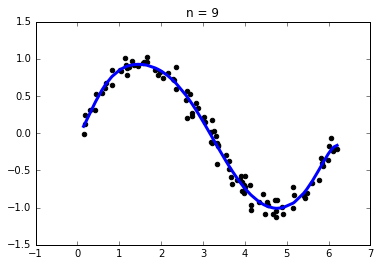

In [51]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$